In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'data/'

In [3]:
import glob

In [4]:
all_files = glob.glob(os.path.join(PATH, "*")) 

In [5]:
from biopandas.pdb import PandasPdb

In [6]:
fname= all_files[0]
fname2= all_files[1]
pl1 = PandasPdb().read_pdb(f'{fname}')
pl2 = PandasPdb().read_pdb(f'{fname2}')
df= pd.DataFrame()
d=pd.DataFrame()
i=0
for fnam in all_files[1:100]:
    pl = PandasPdb().read_pdb(f'{fnam}')
    pl1.df['ATOM']=pl1.df['ATOM'].append(pl.df['ATOM'])
    #pl = d
    i=i+1
    
pl1.df['ATOM']

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,862,,N,,MET,,A,113,,...,-53.020,142.882,21.744,1.0,28.08,,,,NaN,0
1,ATOM,863,,CA,,MET,,A,113,,...,-52.088,143.221,20.682,1.0,27.31,,,,NaN,1
2,ATOM,864,,C,,MET,,A,113,,...,-50.908,143.966,21.325,1.0,26.89,,,,NaN,2
3,ATOM,865,,O,,MET,,A,113,,...,-51.066,145.080,21.824,1.0,26.43,,,,NaN,3
4,ATOM,866,,CB,,MET,,A,113,,...,-52.816,144.112,19.682,1.0,29.47,,,,NaN,4
5,ATOM,867,,CG,,MET,,A,113,,...,-52.166,144.261,18.340,1.0,31.62,,,,NaN,5
6,ATOM,868,,SD,,MET,,A,113,,...,-52.186,142.722,17.415,1.0,37.10,,,,NaN,6
7,ATOM,869,,CE,,MET,,A,113,,...,-50.435,142.577,17.047,1.0,33.99,,,,NaN,7
8,ATOM,870,,N,,PRO,,A,114,,...,-49.710,143.365,21.313,1.0,26.55,,,,NaN,8
9,ATOM,871,,CA,,PRO,,A,114,,...,-48.520,143.985,21.907,1.0,28.47,,,,NaN,9


In [7]:
df = pd.DataFrame()
df=pl1.df['ATOM'].drop(['blank_1', 'alt_loc','blank_2','insertion','blank_3','occupancy','blank_4',
                     'segment_id', 'element_symbol', 'charge', 'line_idx'], axis=1)

In [8]:
df.head()

,record_name,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor
0,ATOM,862,N,MET,A,113,-53.020,142.882,21.744,28.08
1,ATOM,863,CA,MET,A,113,-52.088,143.221,20.682,27.31
2,ATOM,864,C,MET,A,113,-50.908,143.966,21.325,26.89
3,ATOM,865,O,MET,A,113,-51.066,145.080,21.824,26.43
4,ATOM,866,CB,MET,A,113,-52.816,144.112,19.682,29.47


In [9]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [10]:
df['atom_name']=df.atom_name.astype('category')

In [11]:
df['residue_name']=df.residue_name.astype('category')
df['chain_id']=df.chain_id.astype('category')

In [16]:
df.atom_name.dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                  30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                  45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
                  60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
                  75, 76, 77, 78, 79, 80, 81, 82],
                 ordered=False)

In [17]:
df.columns

Index(['record_name', 'atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor'],
      dtype='object')

In [44]:
cat_vars = ['atom_name', 'residue_name', 'chain_id']
contin_vars = [ 'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor']



In [45]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [46]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

KeyError: 'x_coord'

In [1]:
??train_cats(df)

Object `train_cats` not found.


In [47]:
df, y, nas, mapper = proc_df(df, 'x_coord', do_scale=True)

KeyError: 'x_coord'

In [27]:
yl = np.log(y)


/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [24]:
df.head(3)

,record_name,atom_number,atom_name,residue_name,chain_id,residue_number,y_coord,z_coord,b_factor
0,1,862,64,13,1,-0.397359,2.012654,0.048724,-0.379215
1,1,863,2,13,1,-0.397359,2.018520,0.018206,-0.401925
2,1,864,1,13,1,-0.397359,2.031414,0.036684,-0.414312


In [26]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(df) * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [73]:
y=abs(y)

In [74]:
md =ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_vars, bs=128)


In [75]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [76]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [77]:
cat_sz

[('atom_name', 84), ('residue_name', 21), ('chain_id', 8)]

In [78]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [79]:
emb_szs

[(84, 42), (21, 11), (8, 4)]

In [92]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01])
lr = 1e-3

In [93]:
m.lr_find()

 64%|██████▍   | 446/695 [00:02<00:01, 205.26it/s, loss=3.15e+03]


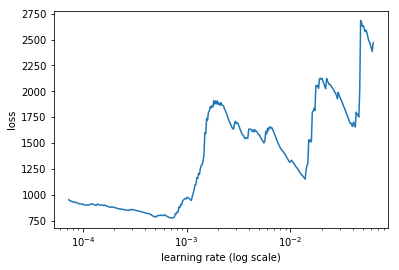

In [94]:
m.sched.plot(100)

In [107]:
lr = 4e-4

In [109]:
m.fit(lr, 10, metrics=[accuracy], cycle_len=4)

[   0.        28.99078 1199.5144     0.     ]                
[   1.        26.83337 1223.70947    0.     ]                
[   2.        25.01142 1211.52698    0.     ]                
[   3.        23.12504 1208.84644    0.     ]                
[   4.        28.43994 1263.44788    0.     ]                
[   5.        26.71309 1214.16724    0.     ]                
[   6.        24.43533 1230.54541    0.     ]                
[   7.        23.9188  1213.09265    0.     ]                
[   8.        29.10645 1286.59802    0.     ]                
[   9.        27.4867  1250.14819    0.     ]                
[  10.        23.67292 1238.85278    0.     ]                
[  11.        22.55258 1228.84082    0.     ]                
[  12.        28.73849 1258.52331    0.     ]                
[  13.        26.90514 1219.06616    0.     ]                
[  14.        24.76738 1228.75269    0.     ]                
[  15.        24.39813 1216.00757    0.     ]                
[  16.  

In [110]:
m.save('m_1')

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, y)


In [87]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [88]:
m.score(trn, y_trn), m.score(val, y_val)

(0.9963398578230339, -0.3707903732800819)